# EDA Chess Game Dataset (Lichess)

In [1]:
#Firstly, we import all the dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("games.csv") # Reading the CSV
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


# General Analysis 

We perform general analysis on the dataset to get better insights

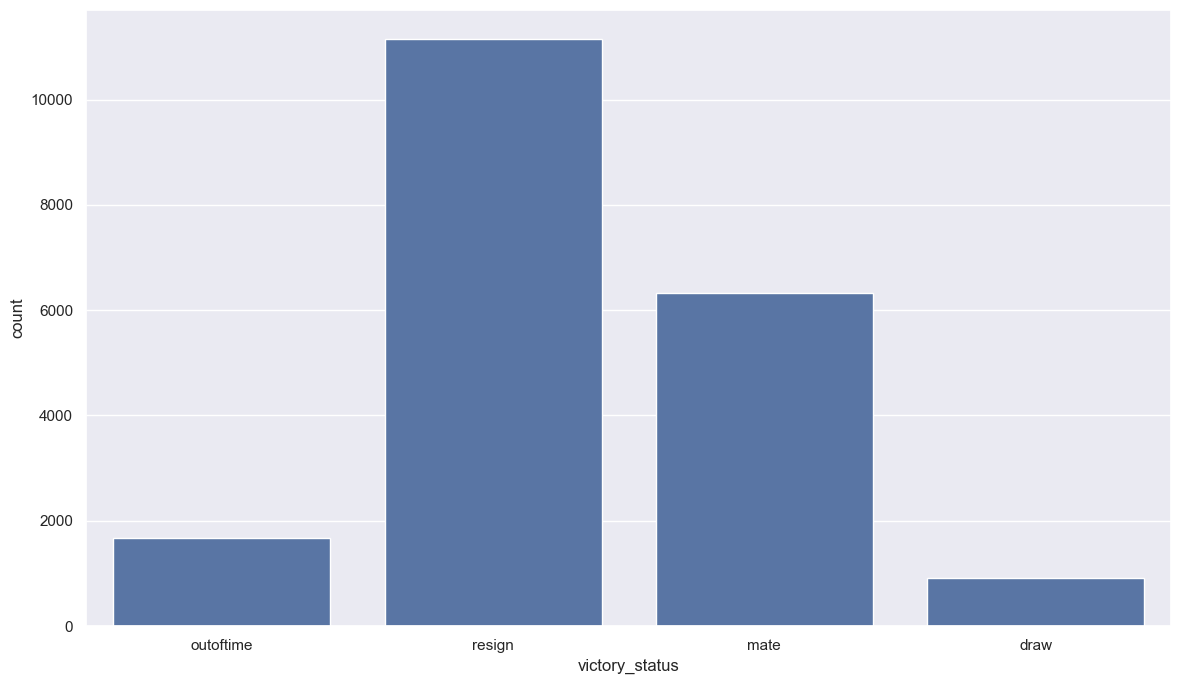

In [5]:
#As there are more victory status, We need a graph to gain insights about it

plt.figure(1,figsize=(14,8))
sns.countplot(x='victory_status',data=df)
plt.show()

### Observations: 
1. Most of the games are won by resignation by the oponent followed by checkmate

<AxesSubplot: xlabel='rated', ylabel='count'>

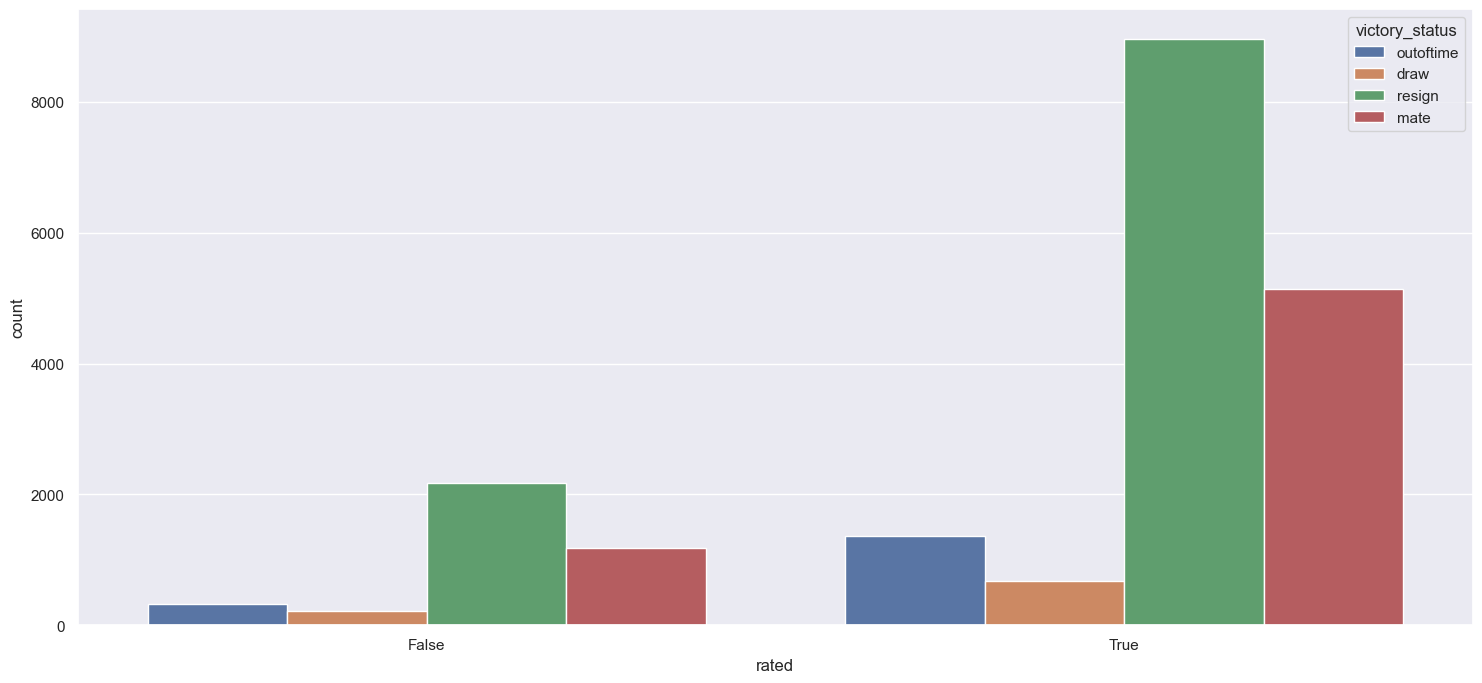

In [6]:
# Analysis to check whether the victory status are labelled ot not

plt.figure(1,figsize=(18,8))
sns.countplot(x='rated',data=df,hue='victory_status')

### Observations: 
1. Most of the games played are rated.
2. Though, the ratio of victory status remains same for both rated and not rated

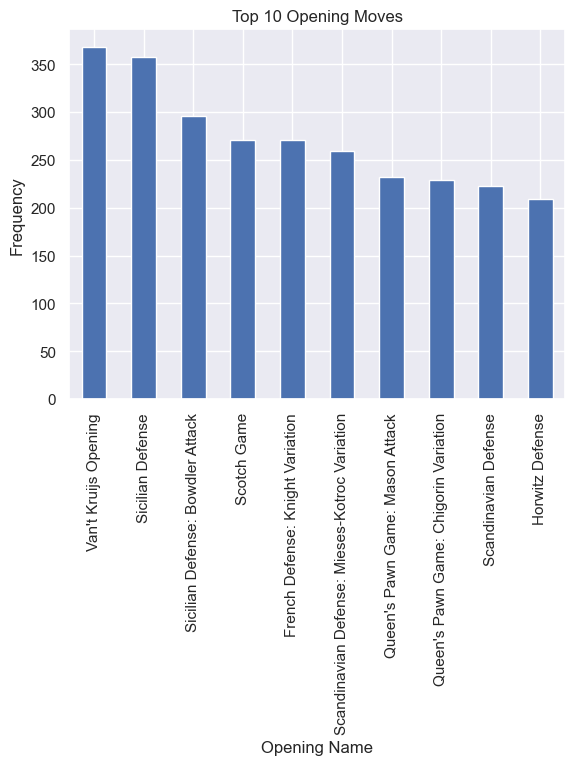

In [7]:
# Analysis on top 10 Opening moves used

opening_counts = df['opening_name'].value_counts()
opening_counts
top_openings = opening_counts.head(10)
top_openings.plot(kind='bar', xlabel='Opening Name', ylabel='Frequency', title='Top 10 Opening Moves')
plt.show()

### Observations: 
1. The most used moves are Van't Kruijs Opening and Sicilian Defense. .


# Trends in dataset by the Colour 


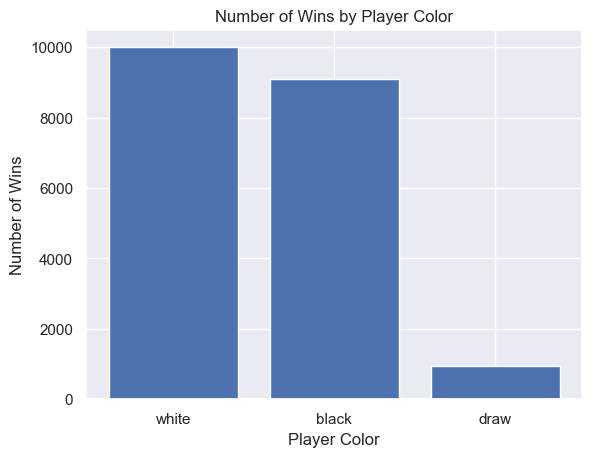

In [8]:
# To start analysing the trends, we need th no.of wins colour-wise

win_counts = df['winner'].value_counts()

plt.bar(win_counts.index, win_counts.values)
plt.xlabel('Player Color')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Player Color')
plt.show()

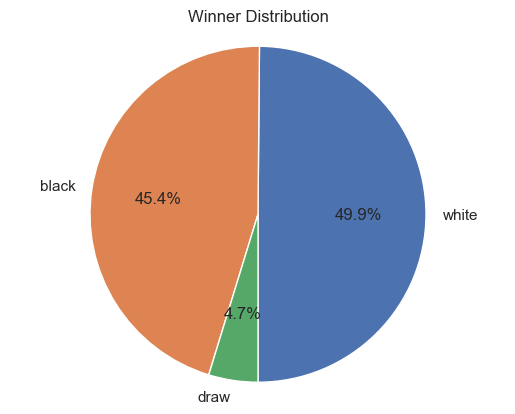

In [9]:
# Percentages of above column chart

winner = df['winner'].value_counts()

# pie chart
plt.pie(winner, labels=winner.index, autopct='%1.1f%%', startangle=270)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Winner Distribution')
plt.show()

### Observations:
1. The number of victories secured by white players outweighs those achieved by black players.

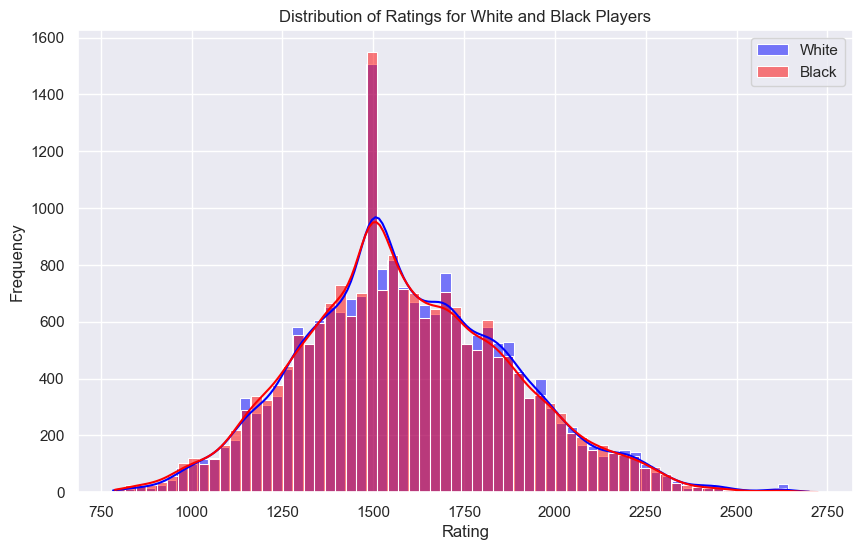

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='white_rating', color='blue', label='White', kde=True)
sns.histplot(data=df, x='black_rating', color='red', label='Black', kde=True)
plt.title('Distribution of Ratings for White and Black Players')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
# average rating
average_white_rating = df[df['winner'] == 'white']['white_rating'].mean()
average_black_rating = df[df['winner'] == 'black']['black_rating'].mean()

print("Average White Player Rating:", average_white_rating)
print("Average Black Player Rating:", average_black_rating)

Average White Player Rating: 1634.1841815818418
Average Black Player Rating: 1638.227297683101


### Observations:
1. From the above histogram , it is observed that most ratings are between 1250 to 1800 for both black and white
2. The average ratings of both the colours is nealy same  

In [12]:
# Combination of victory status and colour for analysis

victory_status_distribution = df.groupby(['winner', 'victory_status']).size().unstack()
print(victory_status_distribution)

victory_status   draw    mate  outoftime  resign
winner                                          
black             NaN  2981.0      823.0  5303.0
draw            906.0     NaN       44.0     NaN
white             NaN  3344.0      813.0  5844.0


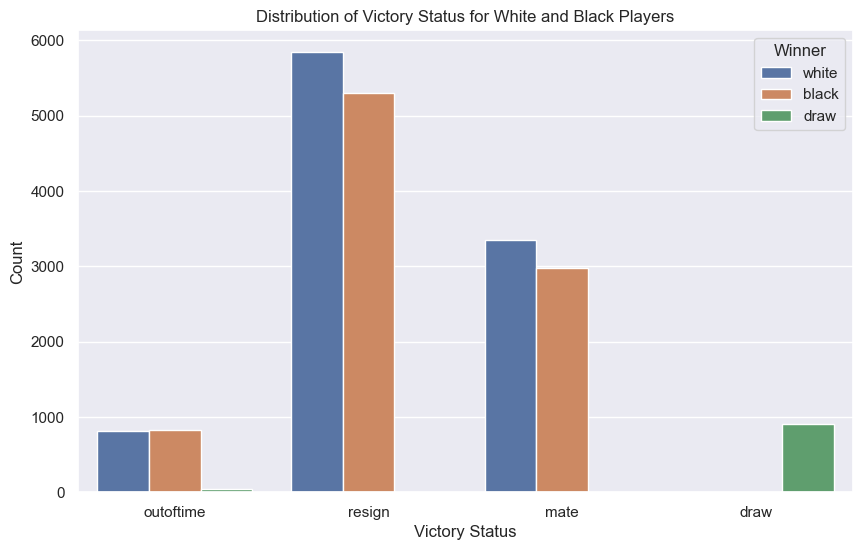

In [13]:
# Plotting the graph for visual analysis

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='victory_status', hue='winner')
plt.title('Distribution of Victory Status for White and Black Players')
plt.xlabel('Victory Status')
plt.ylabel('Count')
plt.legend(title='Winner', loc='upper right')
plt.show()

### Observations:
1. Given the established predominance of white in terms of winning chances, it's noteworthy that a considerable portion of victories stem from resignations by their opponents followed by checkmate.

# Trend of winners with respect to turns and match time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


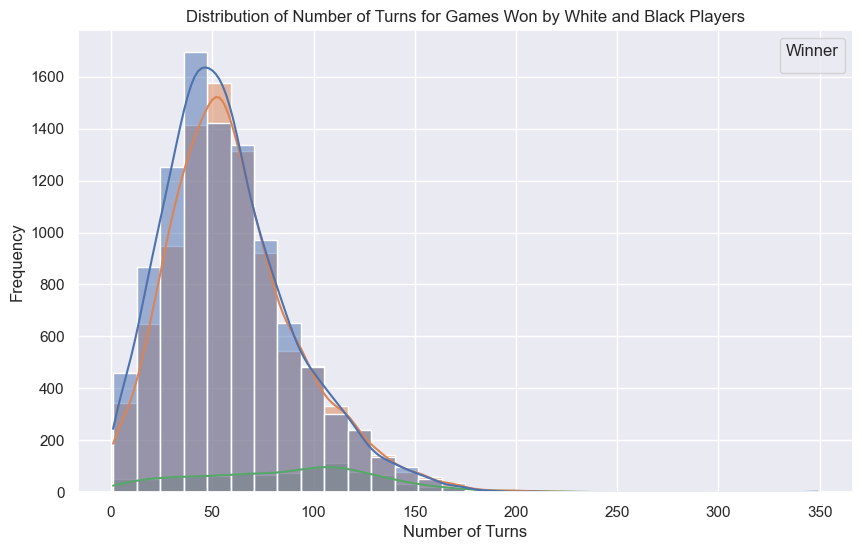

In [14]:
# Visual analysis on No.of turns along with colours

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='turns', hue='winner', kde=True, bins=30)
plt.title('Distribution of Number of Turns for Games Won by White and Black Players')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.legend(title='Winner')
plt.show()

In [15]:
average_white_turns = df[df['winner'] == 'white']['turns'].mean()
average_black_turns = df[df['winner'] == 'black']['turns'].mean()

print("Average Turns for White Players:", average_white_turns)
print("Average Turns for Black Players:", average_black_turns)

Average Turns for White Players: 57.79022097790221
Average Turns for Black Players: 60.72438783353464


### Observations:
1. Most of the games have ended in 30-80 turns.
2. It is observed that Blacks have comparitively higher average no.of turns.

In [16]:
# Analysing the no.of turns for each colour seperately

dfwhite=df[df.winner=='white']
dfblack=df[df.winner=='black']
dfdraw=df[df.winner=='draw']

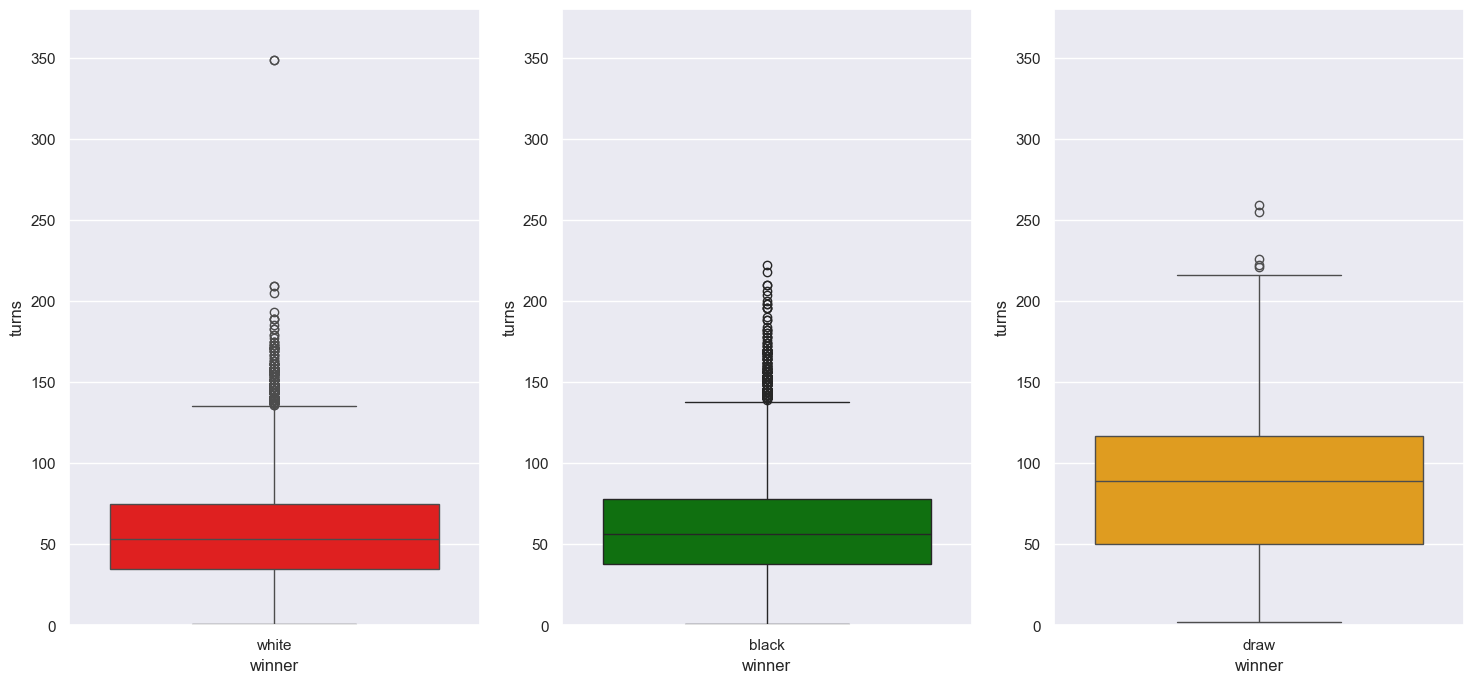

In [17]:
plt.figure(1,figsize=(18,8))
plt.subplot(131)
sns.boxplot(x='winner',y='turns',data=dfwhite,color='red')
plt.ylim(0,380)
plt.subplot(132)
sns.boxplot(x='winner',y='turns',data=dfblack,color='green')
plt.ylim(0,380)
plt.subplot(133)
sns.boxplot(x='winner',y='turns',data=dfdraw,color='orange')
plt.ylim(0,380)

plt.show()

### Observations: 
1. No.of turn in case of white/black winning is generally between 40-70
2. In most of the cases if the no.of turns are above 75 , then it tends to draw

<AxesSubplot: xlabel='winner', ylabel='turns'>

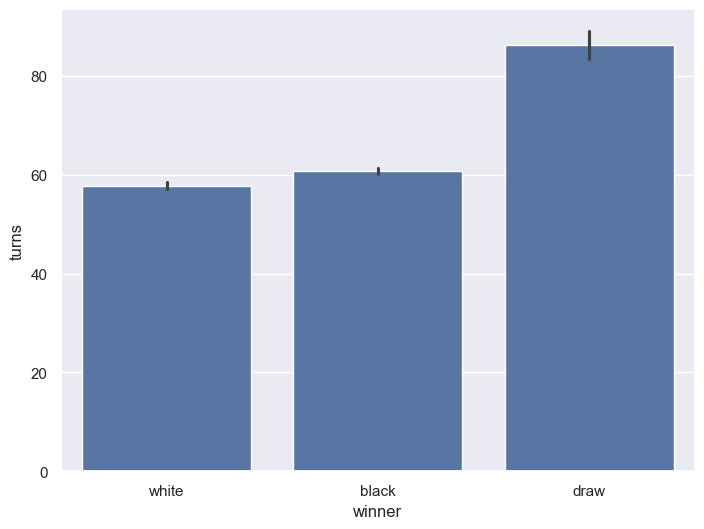

In [18]:


plt.figure(1,figsize=(18,6))
plt.subplot(121)
sns.barplot(x='winner',y='turns',data=df)

### Observations:
1. Almost all of the games last till 60 moves

In [19]:
# Converting the time from unix form to readable form

df_times = df.copy()

df['created_at_dt'] = pd.to_datetime(df['created_at']/1000, 
                                           unit='s', 
                                           origin='unix')

df['last_move_at_dt'] = pd.to_datetime(df['last_move_at']/1000, 
                                             unit='s', 
                                             origin='unix')

df.tail(6)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4,2017-07-11 22:24:07.779000064,2017-07-11 22:33:56.546000128
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-09 23:32:32.648999936,2017-07-09 23:44:49.348000000


In [20]:
# Calculating the difference to get the Duration of match

df['time_diff'] = df['last_move_at_dt'] - df['created_at_dt']


df['match_duration'] = df['time_diff'] / pd.Timedelta(minutes=1)


Text(0.5, 1.0, 'Match Time vs Winner')

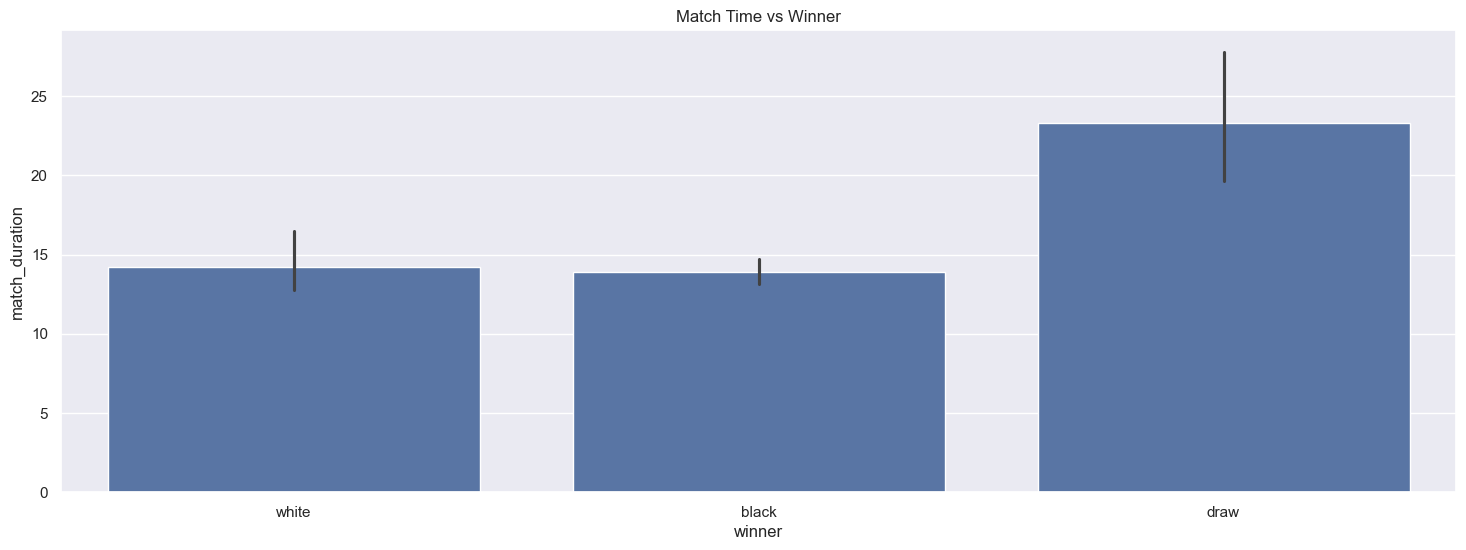

In [21]:
plt.figure(1,figsize=(18,6))
sns.barplot(x='winner', y='match_duration',data=df)
plt.title("Match Time vs Winner")


### Observations:
1. The data suggests a fast-paced format, with most chess matches reaching a conclusion within a short timeframe of 15 minutes.
2. When matches extend beyond the 15-minute mark, the likelihood of a draw increases significantly.

# Analysis on rank/ratings

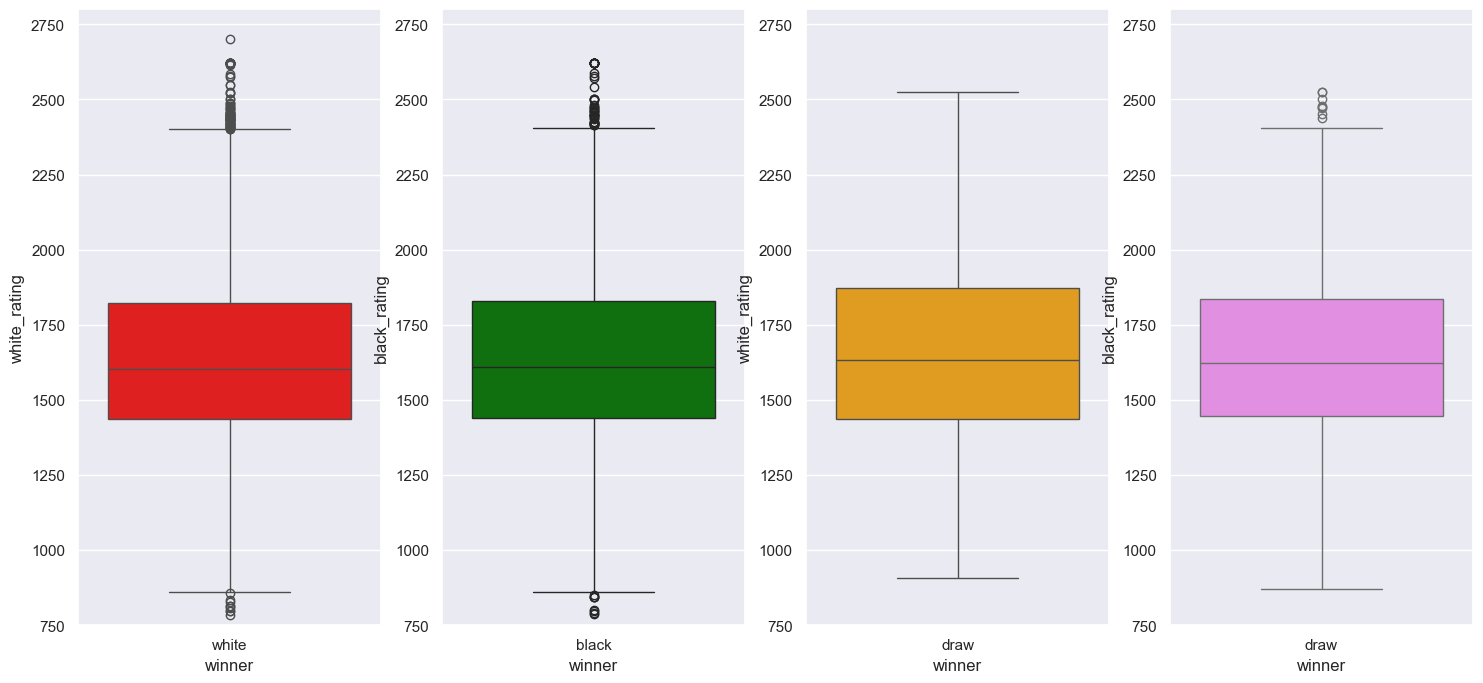

In [22]:
plt.figure(1,figsize=(18,8))
plt.subplot(141)
sns.boxplot(x='winner',y='white_rating',data=dfwhite,color='red')
plt.ylim(750,2800)
plt.subplot(142)
sns.boxplot(x='winner',y='black_rating',data=dfblack,color='green')
plt.ylim(750,2800)
plt.subplot(143)
sns.boxplot(x='winner',y='white_rating',data=dfdraw,color='orange')
plt.ylim(750,2800)
plt.subplot(144)
sns.boxplot(x='winner',y='black_rating',data=dfdraw,color='violet')
plt.ylim(750,2800)
plt.show()

### Observations:
1. The rating for white player, when they tend to win is between 1450-1800 whereas in case of draw, the ratings are between 1450-1900
2. The rating for black player, when they tend to win is between 1450-1800 even in case of draws.

In [23]:
rated_games_distribution = df.groupby(['rated', 'winner']).size().unstack()
# print(rated_games_distribution)

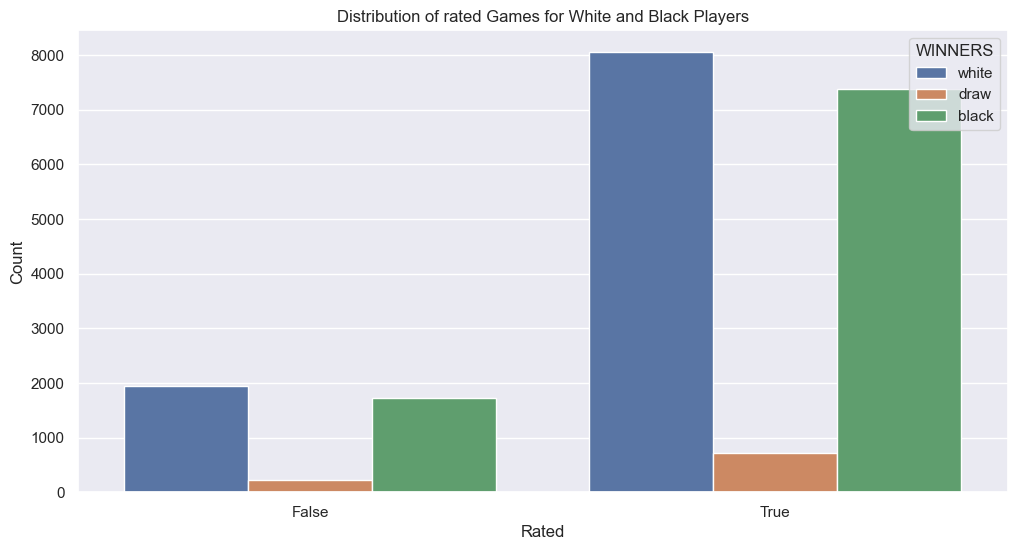

In [24]:
# To get the insights on rated matches w.r.t to colours

plt.figure(figsize=(12,6))
sns.countplot(data=df,x='rated',hue='winner')
plt.title('Distribution of rated Games for White and Black Players')
plt.xlabel('Rated')
plt.ylabel('Count')
plt.legend(title="WINNERS",loc="upper right")
plt.show()

### Observations: 
1. Majority of the games are Rated.

# Trends in opening w.r.t colours

C:\Users\dell\AppData\Local\Temp\ipykernel_18764\3009165668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings_black.values, y=top_openings_black.index, palette='Reds_d')


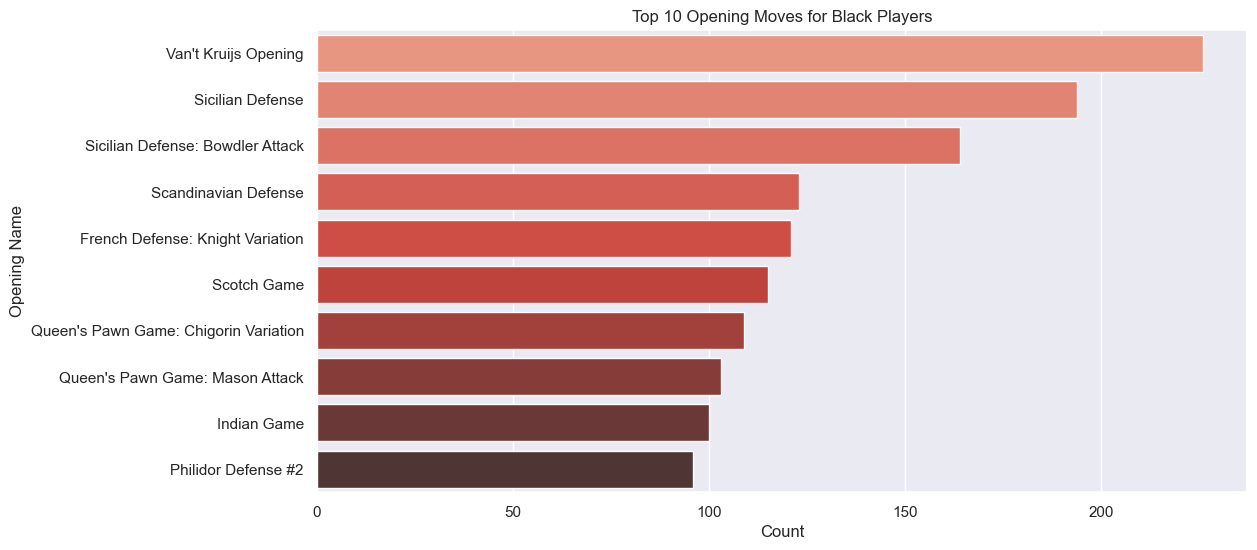

In [25]:
top_openings_white = df[df['winner'] == 'white']['opening_name'].value_counts().head(10)
top_openings_black = df[df['winner'] == 'black']['opening_name'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings_black.values, y=top_openings_black.index, palette='Reds_d')
plt.title('Top 10 Opening Moves for Black Players')
plt.xlabel('Count')
plt.ylabel('Opening Name')
plt.show()


### Observations: 
1. Most used opening move by black players is Van't Krujis Opening

C:\Users\dell\AppData\Local\Temp\ipykernel_18764\1497508510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings_white.values, y=top_openings_white.index, palette='Blues_d')


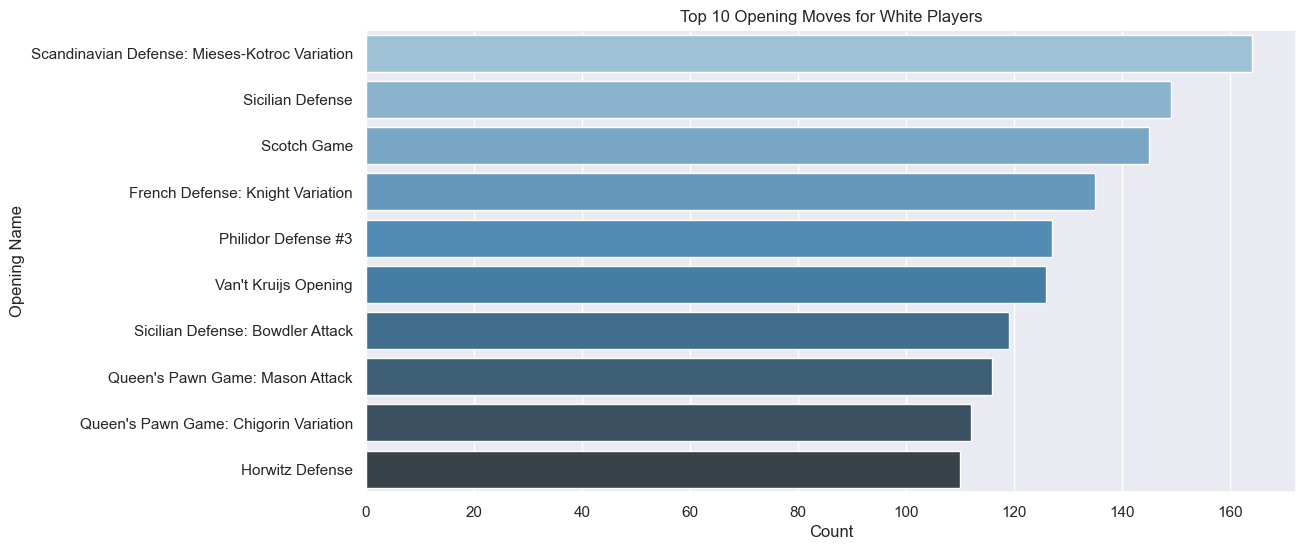

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings_white.values, y=top_openings_white.index, palette='Blues_d')
plt.title('Top 10 Opening Moves for White Players')
plt.xlabel('Count')
plt.ylabel('Opening Name')
plt.show()

### Observations: 
1. Most used opening move by white players are Scandivinavian Defense: Mieses-Kotroc Variation

# Training the model

In [27]:
# Securing the original dataset

data=df.copy()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               20058 non-null  object         
 1   rated            20058 non-null  bool           
 2   created_at       20058 non-null  float64        
 3   last_move_at     20058 non-null  float64        
 4   turns            20058 non-null  int64          
 5   victory_status   20058 non-null  object         
 6   winner           20058 non-null  object         
 7   increment_code   20058 non-null  object         
 8   white_id         20058 non-null  object         
 9   white_rating     20058 non-null  int64          
 10  black_id         20058 non-null  object         
 11  black_rating     20058 non-null  int64          
 12  moves            20058 non-null  object         
 13  opening_eco      20058 non-null  object         
 14  opening_name     20058

In [29]:
# Data preprocessing
encoder = LabelEncoder()
df['victory_status'] = encoder.fit_transform(df['victory_status'])
df['opening_name'] = encoder.fit_transform(df['opening_name'])
df['winner'] = encoder.fit_transform(df['winner'])

# Define features (X) and target variable (y)
X = df.drop(['id', 'rated', 'created_at', 'last_move_at', 'victory_status',
       'winner', 'increment_code', 'white_id', 'black_id',
        'moves', 'opening_eco',  'opening_ply','last_move_at_dt','created_at_dt','time_diff'], axis=1)
y = df['winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:


# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"\n{name} Accuracy:", accuracy)
    print(f"\nClassification Report for {name}:")
    print(classification_rep)


Logistic Regression Accuracy: 0.6261216350947159

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1816
           1       1.00      0.02      0.03       192
           2       0.63      0.72      0.67      2004

    accuracy                           0.63      4012
   macro avg       0.75      0.44      0.44      4012
weighted avg       0.64      0.63      0.61      4012


Random Forest Accuracy: 0.6627617148554337

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1816
           1       0.68      0.09      0.16       192
           2       0.66      0.74      0.70      2004

    accuracy                           0.66      4012
   macro avg       0.67      0.49      0.50      4012
weighted avg       0.66      0.66      0.65      4012


Gradient Boosting Accuracy: 0.7121136590229312

Class

### We get highest accuracy in Gradient Boost with accuracy of 71%

# Summary Report on Chess Game Dataset Analysis



#### Overview:
The analysis delved into a dataset comprising chess game records sourced from Lichess, revealing intriguing 
insights into gameplay dynamics, player strategies, and match outcomes.

#### Key Findings:

1. **Game Outcomes:**
   - The majority of games concluded with resignations by opponents or checkmate, showcasing the dominance 
      of certain strategies.
   - White players demonstrated a notable advantage in winning chances compared to their black counterparts.
   - Resignation followed by checkmate emerged as a common sequence leading to victories, while draws were 
     prevalent in games extending beyond 75 turns.

2. **Player Ratings:**
   - Most players boasted ratings falling within the range of 1250 to 1800 for both white and black, indicating 
     a competitive skill level among participants.
   - On average, the ratings of both white and black players exhibited similarity, suggesting balanced matchups.
   - Winning ratings for both white and black players typically fell between 1450 to 1800, while draw ratings 
     ranged from 1450 to 1900.

3. **Game Duration:**
   - The majority of games were resolved within 40 to 70 turns, with an average duration of approximately 60 moves,
     highlighting the efficiency of gameplay.
   - Matches extending beyond 15 minutes significantly increased the likelihood of draws, indicating a shift towards
     more defensive strategies.

4. **Opening Moves:**
   - The Van,t Kruijs Opening emerged as a popular choice for both black and white players, reflecting its effectiveness
    in initiating gameplay.
   - White players frequently favored the Scandinavian Defense: Mieses-Kotroc Variation as their opening move, showcasing
     strategic diversity.

5. **Model Accuracy:**
   - Gradient Boost yielded the highest accuracy of 71%, indicating its effectiveness in predicting game outcomes based on 
     the provided features.

#### Insights:
- The dataset portrays a fast-paced format, with matches typically concluding within a short timeframe of 15 minutes,
  underscoring the intensity of gameplay.
- Longer games tend to favor draws, suggesting a balance of offensive and defensive strategies employed by players.
- Despite the inherent advantage of white players, evidenced by their higher win rates, the similarity in average ratings
  between white and black players indicates a competitive environment.

#### Conclusion:
The analysis offers valuable insights into the intricate dynamics of chess gameplay, unraveling patterns in player strategies,
game outcomes, and the impact of various factors such as time control, opening moves, and predictive modeling. Understanding these trends can enrich players' decision-making processes and contribute to the continual refinement of chess tactics and strategies.